In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from collections import Counter, defaultdict

In [5]:
def error_message(m, e):
    
    # m is the message, e is the probability of error
    
    r = random.random()
    
    if not r > e:
        m_out = random.choice(P[m,:].nonzero()[0])
    else:
        m_out = m
    
    return m_out

In [6]:
def change_m(m1, m2, gamma):
    
    r = random.random()
    
    if not r > gamma:
        m_poss = P[m1,:].nonzero()[0]
        
        if m2 in m_poss:
            m_out = m1
            
        else:
            m_out = m1
        
    else:
        m_out = m2
    
    return m_out

In [7]:
G = nx.barabasi_albert_graph(1000, 2)

In [520]:
G = nx.erdos_renyi_graph(1000, 0.1)

In [8]:
P = np.array([[0, 1, 1, 0],
             [1, 0, 0, 1],
             [1, 0, 0, 1],
             [0, 1, 1, 0]])

In [522]:
num_seeds = 1
all0 = True
beta = 0.15 # probability of spread
e = 0.1 # error

In [523]:
for n in G.nodes:
    G.nodes[n]['M'] = -1

In [524]:
for _ in range(num_seeds):
    
    node = random.randint(0, len(G.nodes) - 1)
    
    if all0:
        G.nodes[node]['M'] = 0
    else:
        m = random.randint(0, P.shape[0]-1)
        G.nodes[node]['M'] = m
        print(m)

In [525]:
counts = {x: list() for x in range(-1, P.shape[0])}

T = 50

for t in tqdm(range(T)):
    
    valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates
    
    while len(valid_nodes) > 0:
    
        n = random.choice(valid_nodes)
        valid_nodes.remove(n)

        n_state = G.nodes[n]['M']


        neighbors = list(G.neighbors(n))

        for ni in neighbors:

            if not random.random() > beta:

                ni_state = G.nodes[ni]['M']

                if ni_state < 0:
                    G.nodes[ni]['M'] = error_message(n_state, e)
                
                else:
                    pass
            
            else:
                pass
            
            
    cts = Counter([data['M'] for node, data in G.nodes(data=True)])
    
    for x in counts.keys(): 
        counts[x].append(cts[x])
                
    


100%|██████████| 50/50 [00:02<00:00, 23.14it/s]


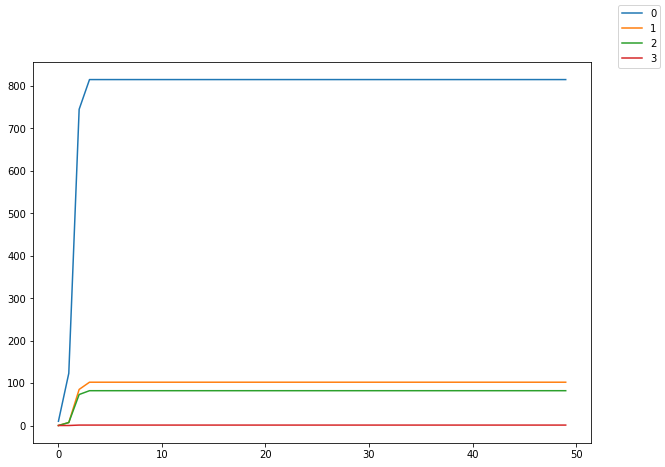

In [526]:
fig, axs = plt.subplots(figsize=(10,7))
for x in [c for c in counts.keys() if c >=0 ]:
    axs.plot(range(T), counts[x], label=x)
    
fig.legend()

In [527]:
# with behavior change mechanisms

In [528]:
#G = nx.barabasi_albert_graph(1000, 2)
G = nx.erdos_renyi_graph(1000, 0.1)

for n in G.nodes:
    G.nodes[n]['M'] = -1

P = np.array([[0, 1, 1, 0],
             [1, 0, 0, 1],
             [1, 0, 0, 1],
             [0, 1, 1, 0]])

num_seeds = 1
all0 = True
beta = 0.15 # probability of spread
e = 0.1 # error

for _ in range(num_seeds):
    node = random.randint(0, len(G.nodes) - 1)
    
    if all0:
        G.nodes[node]['M'] = 0
    else:
        m = random.randint(0, P.shape[0]-1)
        G.nodes[node]['M'] = m
        print(m)

In [529]:
gamma = 0.1
# With changing beliefs

counts = {x: list() for x in range(-1, P.shape[0])}

T = 50

for t in tqdm(range(T)):
    
    valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates
    
    while len(valid_nodes) > 0:
    
        n = random.choice(valid_nodes)
        valid_nodes.remove(n)

        n_state = G.nodes[n]['M']


        neighbors = list(G.neighbors(n))

        for ni in neighbors:

            if not random.random() > beta:

                ni_state = G.nodes[ni]['M']

                if ni_state < 0:
                    G.nodes[ni]['M'] = error_message(n_state, e)
                
                else:
                    G.nodes[ni]['M'] = change_m(n_state, ni_state, gamma)
                    
            
            else:
                pass
            
            
    cts = Counter([data['M'] for node, data in G.nodes(data=True)])
    
    for x in counts.keys(): 
        counts[x].append(cts[x])
                
    


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


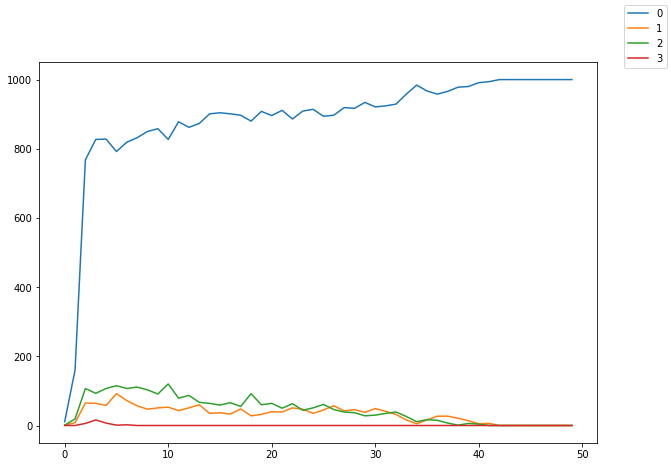

In [530]:
fig, axs = plt.subplots(figsize=(10,7))
for x in [c for c in counts.keys() if c >=0 ]:
    axs.plot(range(T), counts[x], label=x)
    
fig.legend()

# Testing

## SI MODEL

In [5]:
def si_sim(G, e, beta, T=50, num_seeds=1, all0=True, pbar_on=True):
    
    for n in G.nodes:
        G.nodes[n]['M'] = -1
        
    for _ in range(num_seeds):
    
        node = random.randint(0, len(G.nodes) - 1)

        if all0:
            G.nodes[node]['M'] = 0
        else:
            m = random.randint(0, P.shape[0]-1)
            G.nodes[node]['M'] = m
            print(m)
            
    counts = {x: list() for x in range(-1, P.shape[0])}
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)
    

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state < 0:
                        G.nodes[ni]['M'] = error_message(n_state, e)

                    else:
                        pass

                else:
                    pass


        cts = Counter([data['M'] for node, data in G.nodes(data=True)])

        for x in counts.keys(): 
            counts[x].append(cts[x])
                
    return counts

In [6]:
N = 10000
beta = 0.1
T = 100
err = 0.1

In [8]:
A = nx.erdos_renyi_graph(N, 4/N)
Asim = si_sim(A, beta=beta, e=err, T=T)

100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


In [10]:
B = nx.barabasi_albert_graph(N, 2)
Bsim = si_sim(B, beta=beta, e=err, T=T)

100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


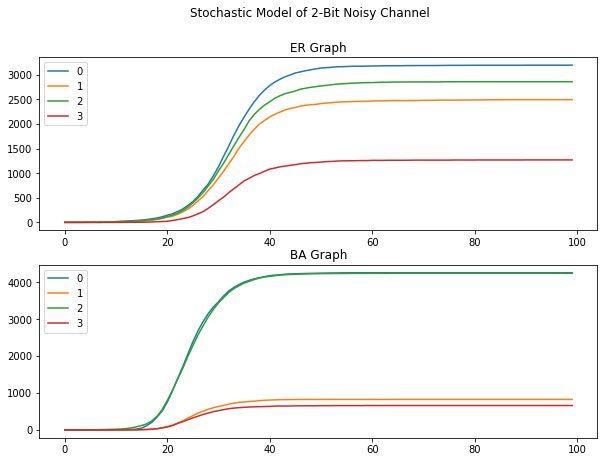

In [29]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in Asim.keys() if c >=0 ]:
    axs[0].plot(range(T), Asim[x], label=x)
    axs[0].set_title('ER Graph')

for x in [c for c in Bsim.keys() if c >=0 ]:
    axs[1].plot(range(T), Bsim[x], label=x)
    axs[1].set_title('BA Graph')

axs[0].legend()
axs[1].legend()
fig.suptitle('Stochastic Model of 2-Bit Noisy Channel')
plt.savefig('discrete_stochastic_2bit.pdf')

In [15]:
ER_entropies = list()

for t in range(T):
    total = sum(Asim[x][t] for x in Asim.keys())
    p = list()
    for x in Asim:
        px = Asim[x][t]/total
        if px > 0:
            p.append(px)
    p = np.array(p)
    h = -np.sum(p * np.log2(p))
    ER_entropies.append(h)

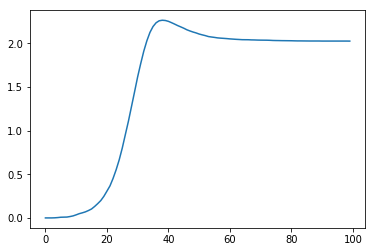

In [16]:
plt.plot(range(T), ER_entropies)

In [17]:
BA_entropies = list()

for t in range(T):
    total = sum(Bsim[x][t] for x in Bsim.keys())
    p = list()
    for x in Bsim:
        px = Bsim[x][t]/total
        if px > 0:
            p.append(px)
    p = np.array(p)
    h = -np.sum(p * np.log2(p))
    BA_entropies.append(h)

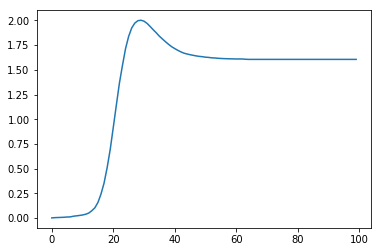

In [18]:
plt.plot(range(T), BA_entropies)

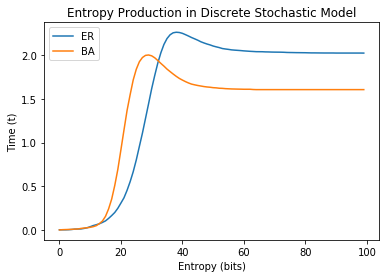

In [28]:
plt.plot(range(T), ER_entropies, label='ER')
plt.plot(range(T), BA_entropies, label='BA')
plt.legend()
plt.ylabel('Time (t)')
plt.xlabel('Entropy (bits)')
plt.title('Entropy Production in Discrete Stochastic Model')

plt.savefig('discrete_entropy_production.pdf')

In [24]:
deg_ER = [A.degree(i) for i in A.nodes]
deg_BA = [B.degree(i) for i in B.nodes]

In [25]:
np.mean(deg_ER), np.mean(deg_BA)

(4.0024, 3.9992)

In [ ]:
# Perhaps we can consider max size as a function of e



In [56]:
ER_ve_entropies = list()
BA_ve_entropies = list()

for j in tqdm(range(100)):
    
    err_j = j/100
    
    her_list = list()
    hba_list = list()
    
    ERsim = si_sim(A, beta=beta, e=err_j, T=T)
    BAsim = si_sim(B, beta=beta, e=err_j, T=T)
    
    for t in range(T):
        total = sum(ERsim[x][t] for x in ERsim.keys())
        p = list()
        for x in ERsim:
            px = ERsim[x][t]/total
            if px > 0:
                p.append(px)
        p = np.array(p)
        h = -np.sum(p * np.log2(p))
        her_list.append(h)
    ER_ve_entropies.append(her_list)
    
    for t in range(T):
        total = sum(ERsim[x][t] for x in ERsim.keys())
        p = list()
        for x in ERsim:
            px = ERsim[x][t]/total
            if px > 0:
                p.append(px)
        p = np.array(p)
        h = -np.sum(p * np.log2(p))
        her_list.append(h)
    ER_ve_entropies.append(her_list)
    
    for t in range(T):
        total = sum(BAsim[x][t] for x in BAsim.keys())
        p = list()
        for x in BAsim:
            px = BAsim[x][t]/total
            if px > 0:
                p.append(px)
        p = np.array(p)
        h = -np.sum(p * np.log2(p))
        her_list.append(h)
    BA_ve_entropies.append(her_list)



  0%|          | 0/100 [00:00<?, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]


 28%|██▊       | 28/100 [00:00<00:00, 276.68it/s]


 37%|███▋      | 37/100 [00:00<00:00, 103.16it/s]


 45%|████▌     | 45/100 [00:01<00:02, 20.16it/s] 


 51%|█████     | 51/100 [00:03<00:05,  8.19it/s]


 55%|█████▌    | 55/100 [00:04<00:08,  5.32it/s]


 58%|█████▊    | 58/100 [00:05<00:10,  3.91it/s]


 60%|██████    | 60/100 [00:06<00:12,  3.31it/s]


 62%|██████▏   | 62/100 [00:07<00:12,  3.00it/s]


 64%|██████▍   | 64/100 [00:08<00:12,  2.86it/s]


 65%|██████▌   | 65/100 [00:08<00:12,  2.78it/s]


 66%|██████▌   | 66/100 [00:09<00:12,  2.70it/s]


 67%|██████▋   | 67/100 [00:09<00:12,  2.67it/s]


 68%|██████▊   | 68/100 [00:09<00:12,  2.64it/s]


 69%|██████▉   | 69/100 [00:10<00:11,  2.67it/s]


 70%|███████   | 70/100 [00:10<00:11,  2.65it/s]


 71%|███████   | 71/100 [00:10<00:10,  2.65it/s]


 72%|███████▏  | 72/100 [00:11<00:10,  2.69it/s]


 73%|███████▎  | 73/100 [00:11<00:09,  2.71i

 89%|████████▉ | 89/100 [00:14<00:04,  2.70it/s]


 90%|█████████ | 90/100 [00:15<00:03,  2.70it/s]


 91%|█████████ | 91/100 [00:15<00:03,  2.72it/s]


 92%|█████████▏| 92/100 [00:15<00:02,  2.71it/s]


 93%|█████████▎| 93/100 [00:16<00:02,  2.72it/s]


 94%|█████████▍| 94/100 [00:16<00:02,  2.74it/s]


 95%|█████████▌| 95/100 [00:17<00:01,  2.74it/s]


 96%|█████████▌| 96/100 [00:17<00:01,  2.74it/s]


 97%|█████████▋| 97/100 [00:17<00:01,  2.74it/s]


 98%|█████████▊| 98/100 [00:18<00:00,  2.75it/s]


 99%|█████████▉| 99/100 [00:18<00:00,  2.75it/s]


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]



  0%|          | 0/100 [00:00<?, ?it/s]


 17%|█▋        | 17/100 [00:00<00:00, 138.91it/s]


 22%|██▏       | 22/100 [00:00<00:01, 40.34it/s] 


 26%|██▌       | 26/100 [00:01<00:05, 14.29it/s]


 29%|██▉       | 29/100 [00:01<00:09,  7.87it/s]


 31%|███       | 31/100 [00:02<00:12,  5.53it/s]


 33%|███▎      | 33/100 [00:03<00:15,  4.46it/s]


 35%|███▌      | 35/100 [00:03<00:17

 47%|████▋     | 47/100 [00:09<00:20,  2.60it/s]


 48%|████▊     | 48/100 [00:09<00:20,  2.58it/s]


 49%|████▉     | 49/100 [00:10<00:20,  2.50it/s]


 50%|█████     | 50/100 [00:10<00:20,  2.50it/s]


 51%|█████     | 51/100 [00:10<00:19,  2.49it/s]


 52%|█████▏    | 52/100 [00:11<00:18,  2.53it/s]


 53%|█████▎    | 53/100 [00:11<00:18,  2.56it/s]


 54%|█████▍    | 54/100 [00:12<00:17,  2.59it/s]


 55%|█████▌    | 55/100 [00:12<00:17,  2.60it/s]


 56%|█████▌    | 56/100 [00:12<00:16,  2.60it/s]


 57%|█████▋    | 57/100 [00:13<00:16,  2.61it/s]


 58%|█████▊    | 58/100 [00:13<00:16,  2.59it/s]


 59%|█████▉    | 59/100 [00:14<00:15,  2.59it/s]


 60%|██████    | 60/100 [00:14<00:15,  2.55it/s]


 61%|██████    | 61/100 [00:14<00:15,  2.51it/s]


 62%|██████▏   | 62/100 [00:15<00:15,  2.52it/s]


 63%|██████▎   | 63/100 [00:15<00:14,  2.56it/s]


 64%|██████▍   | 64/100 [00:16<00:13,  2.58it/s]


 65%|██████▌   | 65/100 [00:16<00:13,  2.58it/s]


 66%|██████▌   | 66/100 [00:16<

 17%|█▋        | 17/100 [00:00<00:00, 168.97it/s]


 23%|██▎       | 23/100 [00:00<00:01, 44.50it/s] 


 28%|██▊       | 28/100 [00:01<00:05, 13.80it/s]


 31%|███       | 31/100 [00:02<00:09,  7.51it/s]


 34%|███▍      | 34/100 [00:03<00:12,  5.29it/s]


 36%|███▌      | 36/100 [00:03<00:14,  4.30it/s]


 38%|███▊      | 38/100 [00:04<00:16,  3.68it/s]


 39%|███▉      | 39/100 [00:04<00:18,  3.36it/s]


 40%|████      | 40/100 [00:05<00:19,  3.15it/s]


 41%|████      | 41/100 [00:05<00:19,  3.01it/s]


 42%|████▏     | 42/100 [00:06<00:19,  2.93it/s]


 43%|████▎     | 43/100 [00:06<00:19,  2.86it/s]


 44%|████▍     | 44/100 [00:06<00:19,  2.82it/s]


 45%|████▌     | 45/100 [00:07<00:19,  2.79it/s]


 46%|████▌     | 46/100 [00:07<00:19,  2.77it/s]


 47%|████▋     | 47/100 [00:07<00:19,  2.76it/s]


 48%|████▊     | 48/100 [00:08<00:19,  2.73it/s]


 49%|████▉     | 49/100 [00:08<00:18,  2.73it/s]


 50%|█████     | 50/100 [00:08<00:18,  2.71it/s]


 51%|█████     | 51/100 [00:0

 10%|█         | 10/100 [07:50<1:07:32, 45.03s/it]


  0%|          | 0/100 [00:00<?, ?it/s]


 25%|██▌       | 25/100 [00:00<00:00, 222.04it/s]


 32%|███▏      | 32/100 [00:00<00:01, 65.69it/s] 


 38%|███▊      | 38/100 [00:01<00:03, 18.38it/s]


 42%|████▏     | 42/100 [00:02<00:06,  8.69it/s]


 45%|████▌     | 45/100 [00:03<00:09,  5.89it/s]


 48%|████▊     | 48/100 [00:04<00:11,  4.62it/s]


 50%|█████     | 50/100 [00:04<00:12,  4.01it/s]


 52%|█████▏    | 52/100 [00:05<00:13,  3.62it/s]


 53%|█████▎    | 53/100 [00:05<00:13,  3.36it/s]


 54%|█████▍    | 54/100 [00:06<00:14,  3.21it/s]


 55%|█████▌    | 55/100 [00:06<00:14,  3.09it/s]


 56%|█████▌    | 56/100 [00:06<00:14,  3.00it/s]


 57%|█████▋    | 57/100 [00:07<00:14,  2.95it/s]


 58%|█████▊    | 58/100 [00:07<00:14,  2.92it/s]


 59%|█████▉    | 59/100 [00:07<00:14,  2.89it/s]


 60%|██████    | 60/100 [00:08<00:13,  2.87it/s]


 61%|██████    | 61/100 [00:08<00:13,  2.83it/s]


 62%|██████▏   | 62/100 [00:09<00:13

 69%|██████▉   | 69/100 [00:12<00:11,  2.76it/s]


 70%|███████   | 70/100 [00:12<00:10,  2.74it/s]


 71%|███████   | 71/100 [00:12<00:10,  2.74it/s]


 72%|███████▏  | 72/100 [00:13<00:10,  2.74it/s]


 73%|███████▎  | 73/100 [00:13<00:09,  2.74it/s]


 74%|███████▍  | 74/100 [00:13<00:09,  2.73it/s]


 75%|███████▌  | 75/100 [00:14<00:09,  2.74it/s]


 76%|███████▌  | 76/100 [00:14<00:08,  2.74it/s]


 77%|███████▋  | 77/100 [00:14<00:08,  2.74it/s]


 78%|███████▊  | 78/100 [00:15<00:08,  2.74it/s]


 79%|███████▉  | 79/100 [00:15<00:07,  2.75it/s]


 80%|████████  | 80/100 [00:16<00:07,  2.75it/s]


 81%|████████  | 81/100 [00:16<00:06,  2.77it/s]


 82%|████████▏ | 82/100 [00:16<00:06,  2.77it/s]


 83%|████████▎ | 83/100 [00:17<00:06,  2.75it/s]


 84%|████████▍ | 84/100 [00:17<00:05,  2.75it/s]


 85%|████████▌ | 85/100 [00:17<00:05,  2.75it/s]


 86%|████████▌ | 86/100 [00:18<00:05,  2.76it/s]


 87%|████████▋ | 87/100 [00:18<00:04,  2.76it/s]


 88%|████████▊ | 88/100 [00:18<

 65%|██████▌   | 65/100 [00:11<00:12,  2.72it/s]


 66%|██████▌   | 66/100 [00:11<00:12,  2.72it/s]


 67%|██████▋   | 67/100 [00:11<00:12,  2.74it/s]


 68%|██████▊   | 68/100 [00:12<00:11,  2.75it/s]


 69%|██████▉   | 69/100 [00:12<00:11,  2.75it/s]


 70%|███████   | 70/100 [00:13<00:10,  2.75it/s]


 71%|███████   | 71/100 [00:13<00:10,  2.75it/s]


 72%|███████▏  | 72/100 [00:13<00:10,  2.76it/s]


 73%|███████▎  | 73/100 [00:14<00:09,  2.76it/s]


 74%|███████▍  | 74/100 [00:14<00:09,  2.77it/s]


 75%|███████▌  | 75/100 [00:14<00:09,  2.78it/s]


 76%|███████▌  | 76/100 [00:15<00:08,  2.78it/s]


 77%|███████▋  | 77/100 [00:15<00:08,  2.76it/s]


 78%|███████▊  | 78/100 [00:15<00:07,  2.76it/s]


 79%|███████▉  | 79/100 [00:16<00:07,  2.76it/s]


 80%|████████  | 80/100 [00:16<00:07,  2.76it/s]


 81%|████████  | 81/100 [00:17<00:06,  2.76it/s]


 82%|████████▏ | 82/100 [00:17<00:06,  2.76it/s]


 83%|████████▎ | 83/100 [00:17<00:06,  2.77it/s]


 84%|████████▍ | 84/100 [00:18<

KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(2)

for trial in ER_ve_entropies:
    axs[0].plot(range(T), trial, color='b')

for trial in BA_ve_entropies:
    axs[1].plot(range(T), trial, color='orange')

In [57]:
P

array([[0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## SII MODEL

In [449]:
def sii_sim(G, e, beta, gamma, T=50, num_seeds=1, all0=True, pbar_on=True):
    
    for n in G.nodes:
        G.nodes[n]['M'] = -1
        
    for _ in range(num_seeds):
    
        node = random.randint(0, len(G.nodes) - 1)

        if all0:
            G.nodes[node]['M'] = 0
        else:
            m = random.randint(0, P.shape[0]-1)
            G.nodes[node]['M'] = m
            print(m)
            
    counts = {x: list() for x in range(-1, P.shape[0])}
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state < 0:
                        G.nodes[ni]['M'] = error_message(n_state, e)

                    else:
                        G.nodes[ni]['M'] = change_m(n_state, ni_state, gamma)


                else:
                    pass


        cts = Counter([data['M'] for node, data in G.nodes(data=True)])

        for x in counts.keys(): 
            counts[x].append(cts[x])
            
    return counts

In [450]:
A = nx.erdos_renyi_graph(1000, 0.1)
Asiim = sii_sim(A, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:02<00:00, 17.58it/s]


In [451]:
B = nx.barabasi_albert_graph(1000, 2)
Bsiim = sii_sim(B, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:00<00:00, 122.30it/s]


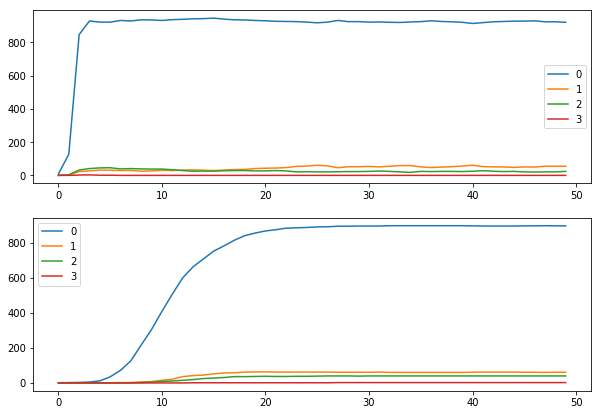

In [452]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in Asiim.keys() if c >=0 ]:
    axs[0].plot(range(T), Asiim[x], label=x)

for x in [c for c in Bsiim.keys() if c >=0 ]:
    axs[1].plot(range(T), Bsiim[x], label=x)

axs[0].legend()
axs[1].legend()

## DIFFERENT P

In [35]:
tstP = nx.erdos_renyi_graph(6, 0.4)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


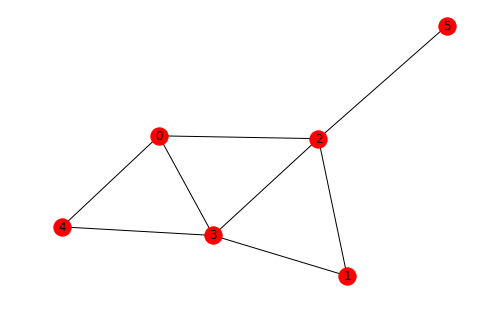

In [54]:
nx.draw(tstP, with_labels=True)
plt.savefig('discrete_semantic_ER_graph.pdf')

In [37]:
P = np.array(nx.adjacency_matrix(tstP).todense())

In [38]:
P

array([[0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [42]:
PA = si_sim(A, 0.1, 0.1, T=100)
PB = si_sim(B, 0.1, 0.1, T=100)



  0%|          | 0/100 [00:00<?, ?it/s]

 25%|██▌       | 25/100 [00:00<00:00, 225.90it/s]

 32%|███▏      | 32/100 [00:00<00:01, 55.47it/s] 

 38%|███▊      | 38/100 [00:01<00:03, 16.58it/s]

 42%|████▏     | 42/100 [00:02<00:07,  7.34it/s]

 45%|████▌     | 45/100 [00:03<00:10,  5.18it/s]

 48%|████▊     | 48/100 [00:04<00:12,  4.07it/s]

 50%|█████     | 50/100 [00:05<00:15,  3.21it/s]

 52%|█████▏    | 52/100 [00:06<00:17,  2.68it/s]

 53%|█████▎    | 53/100 [00:07<00:17,  2.67it/s]

 54%|█████▍    | 54/100 [00:07<00:16,  2.75it/s]

 55%|█████▌    | 55/100 [00:07<00:17,  2.59it/s]

 56%|█████▌    | 56/100 [00:08<00:16,  2.68it/s]

 57%|█████▋    | 57/100 [00:08<00:15,  2.74it/s]

 58%|█████▊    | 58/100 [00:08<00:15,  2.73it/s]

 59%|█████▉    | 59/100 [00:09<00:14,  2.80it/s]

 60%|██████    | 60/100 [00:09<00:14,  2.74it/s]

 61%|██████    | 61/100 [00:10<00:15,  2.53it/s]

 62%|██████▏   | 62/100 [00:10<00:14,  2.55it/s]

 63%|██████▎   | 63/100 [00:10<00:14,  2.53it/s]

 64%|

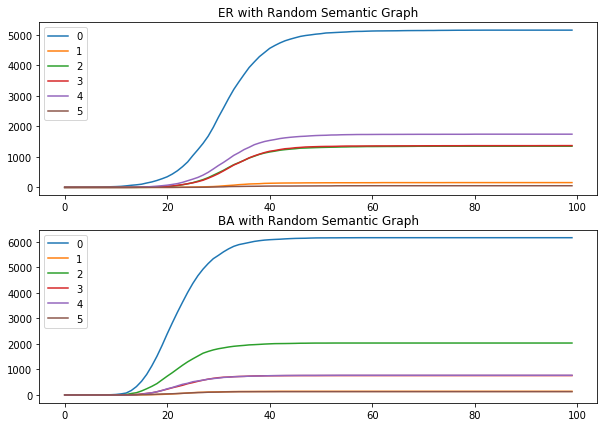

In [50]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in PA.keys() if c >=0 ]:
    axs[0].plot(range(T), PA[x], label=x)
    axs[0].set_title('ER with Random Semantic Graph')

for x in [c for c in PB.keys() if c >=0 ]:
    axs[1].plot(range(T), PB[x], label=x)
    axs[1].set_title('BA with Random Semantic Graph')

axs[0].legend()
axs[1].legend()
plt.savefig('discrete_ER_semantic_both.pdf')

In [44]:
ER_ER_entropies = list()

for t in range(T):
    total = sum(PA[x][t] for x in PA.keys())
    p = list()
    for x in PA:
        px = PA[x][t]/total
        if px > 0:
            p.append(px)
    p = np.array(p)
    h = -np.sum(p * np.log2(p))
    ER_ER_entropies.append(h)
    
BA_ER_entropies = list()

for t in range(T):
    total = sum(PB[x][t] for x in PB.keys())
    p = list()
    for x in PB:
        px = PB[x][t]/total
        if px > 0:
            p.append(px)
    p = np.array(p)
    h = -np.sum(p * np.log2(p))
    BA_ER_entropies.append(h)

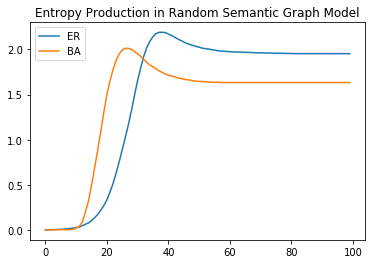

In [53]:
plt.plot(range(100), ER_ER_entropies, label='ER')
plt.plot(range(100), BA_ER_entropies, label='BA')
plt.legend()
plt.title('Entropy Production in Random Semantic Graph Model')
plt.savefig('discrete_entropy_production_ER_semantic_both.pdf')

In [514]:
PA2 = sii_sim(A, 0.05, 0.15, 0.01)
PB2 = sii_sim(B, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:02<00:00, 17.34it/s]

100%|██████████| 50/50 [00:00<00:00, 121.04it/s]


In [ ]:
# Clear difference between these two. Wondering what measures besides perhaps channel capacity we can look at.
# Is there something I can sweep thru??

# Homogenous Simulation

In [11]:
def si_homo_sim(N, e, beta, k, T=50, num_seeds=1, all0=True, pbar_on=True):
    
    pop_dict = {n: -1 for n in range(N)}
        
    for _ in range(num_seeds):
    
        node = random.randint(0, N - 1)

        if all0:
            pop_dict[node]= 0
        else:
            m = random.randint(0, P.shape[0]-1)
            G.nodes[node] = m
            print(f'Initial Seed: {m}')
            
    counts = {x: list() for x in range(-1, P.shape[0])}
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)
    

    for t in pbar:

        valid_nodes = [node for node in pop_dict.keys() if pop_dict[node] != -1] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = pop_dict[n]


            neighbors = np.random.randint(N, size=k)

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = pop_dict[ni]

                    if ni_state < 0:
                        pop_dict[ni] = error_message(n_state, e)

                    else:
                        pass

                else:
                    pass


        cts = Counter(pop_dict.values())

        for x in counts.keys(): 
            counts[x].append(cts[x])
                
    return counts

In [29]:
HO = si_homo_sim(N=10000, e=0.1, beta=0.1, k=4, T=100)


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


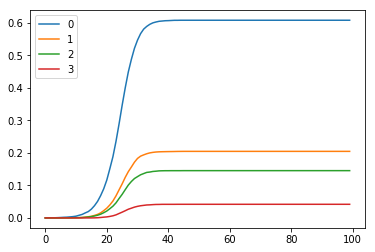

In [32]:
for c in HO.keys():
    if not c < 0:
        plt.plot(range(100), [x/10000 for x in HO[c]], label=c)
        
plt.legend()